# Assignment 3 - SOM - Evaluation Report
## Coding - Implementation f - Mnemonic SOM
### Group f2:
* Christoph Pegrisch - 01525518
* Judith Louis-Alexandre - 12024728 

Link to GitHub repository: https://github.com/CH1525518/MnemonicSOM

## Mnemonic SOM implementation

In order to compute a Mnemonic SOM, several steps have to be performed.  
The first step is to load the input vectors used for the generation of the SOM. Then, the input black and white image is also load and the mnemonic template is computed. The white part corresponds to the active areas, where the grid is drawn and the active matrix is performed.
Based on this active matrix, the distance matrix is computed.  

Now, that the template has been computed, the SOM can be trained.
To do so, we have implemented an MnemonicSOM class, which represents the overall SOM, and a SOMUnit class, which corresponds to each single unit within the SOM.   
The SOM is trained based on the active and distance matrices, as well as the number of epochs for the training, the initial learning rate, the learning rate decay used to update the learning rate at each epoch, the initial neighborhood radius, and the neighborhood radius decay used to update the neighborhood radius at each epoch.  
The SOM units are first initialized based on the active matrix. Then, at each epoch, the vectors of the input dataset are taken in a random order, for each of them, the best unit is found, based on the distance between the input vector and the units, and the weights of the units are updated.  
Finally, the weights list can be exported in order to be used by the standard visualisations.  

More information about the implementation can be found in the `code-documentation` notebook.  
All the relevant code can also be found in the `src` folder.  
To train a Mnemonic SOM, the script in the `main.py` file can be run, which would automatically train a Mnemonic SOM based on the `chainlink` dataset and the `stick_figure` image.

In order to train another SOM, the function `som_test` from the `main.py` file can be run by providing, the name (with extension) of a image stored in the `mnemonics` folder, the name of the input dataset and the value for all the hyperparameters.

## Evaluation visualisations

In order to see the results of our Mnemonic implementation, we will visualize some SOM implementations.  
This notebook can also be found and run in the `src` folder.

In [1]:
import main 
import re

import numpy as np
import matplotlib.pyplot as plt

from SOMToolBox_Parse import SOMToolBox_Parse
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
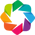

In [3]:
import panel as pn
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

#HitHistogram
def HitHist(_m, _n, _weights, _idata):
    hist = np.zeros(_m * _n)
    for vector in _idata: 
        position = np.argmin(np.sqrt(np.sum(np.power(_weights - vector, 2), axis=1)))
        hist[position] += 1

    return hist.reshape(_m, _n)

#U-Matrix - implementation
def UMatrix(_m, _n, _weights, _dim):
    U = _weights.reshape(_m, _n, _dim)
    U = np.insert(U, np.arange(1, _n), values=0, axis=1)
    U = np.insert(U, np.arange(1, _m), values=0, axis=0)
    
    #calculate interpolation
    for i in range(U.shape[0]): 
        if i%2==0:
            for j in range(1,U.shape[1],2):
                U[i,j][0] = np.linalg.norm(U[i,j-1] - U[i,j+1], axis=-1)
        else:
            for j in range(U.shape[1]):
                if j%2==0: 
                    U[i,j][0] = np.linalg.norm(U[i-1,j] - U[i+1,j], axis=-1)
                else:      
                    U[i,j][0] = (np.linalg.norm(U[i-1,j-1] - U[i+1,j+1], axis=-1) + np.linalg.norm(U[i+1,j-1] - U[i-1,j+1], axis=-1))/(2*np.sqrt(2))
                    
    U = np.sum(U, axis=2) #move from Vector to Scalar

    for i in range(0, U.shape[0], 2): #count new values
        for j in range(0, U.shape[1], 2):
            region = []
            if j>0: region.append(U[i][j-1]) #check left border
            if i>0: region.append(U[i-1][j]) #check bottom
            if j<U.shape[1]-1: region.append(U[i][j+1]) #check right border
            if i<U.shape[0]-1: region.append(U[i+1][j]) #check upper border

            U[i,j] = np.median(region)

    return U

#SDH - implementation
def SDH(_m, _n, _weights, _idata, factor, approach):
    import heapq

    sdh_m = np.zeros( _m * _n)

    cs=0
    for i in range(factor): cs += factor-i

    for vector in _idata:
        dist = np.sqrt(np.sum(np.power(_weights - vector, 2), axis=1))
        c = heapq.nsmallest(factor, range(len(dist)), key=dist.__getitem__)
        if (approach==0): # normalized
            for j in range(factor):  sdh_m[c[j]] += (factor-j)/cs 
        if (approach==1):# based on distance
            for j in range(factor): sdh_m[c[j]] += 1.0/dist[c[j]] 
        if (approach==2): 
            dmin, dmax = min(dist[c]), max(dist[c])
            for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)

    return sdh_m.reshape(_m, _n)

In [4]:
def convert_X_to_dict(X):
    '''Convert X, dataset input vector, to a dictionary that can be used in the visualisations'''
    ret = {}
    ret['xdim'] = len(X)
    ret['ydim'] = 1
    ret['vec_dim'] = len(X[0])
    ret['arr'] = np.array(X)
    return ret

In [5]:
datasets = ['chainlink', '10clusters']
pdf = False
plot_size = {'small': (20,40), 'large': (60,100)}

### Training small and large SOMs

Small (40x20) and large (100x60) SOMs have been trained using the Mnemonic SOM implementation on 3 different input images to see the effect on these images on the resulting SOMs.  

The trained SOMs are stored in the folder, `trained_som`.  

These trained SOMs are then visualized using 3 different visualisations:
* HitHistogram, which visualizes the density of the SOM by counting the number of input vectors mapped onto each node of the SOM, the more active clusters are the visualised by the bright units (dark units in the pdf);
* U-Matrix, which shows the distance between each unit and their neighbourhood, the dark zones delimited by brightful lines are clusters having the similar preferences when it comes to classification;
* Smoothed Data Histogram, which shows the number of most likely positions for each sample, the clusters of units correspond there to the bright zones.

#### Chainlink dataset - 10 epochs

The chainlink dataset is composed by two chains intertwined in three-dimensional space. Thus, the projection on two-dimensional space should lead to two intersections between the chains (areas with points from both chains).  
The SOM implementation should show the clusters form by the input from the same chain.

In [6]:
dataset = datasets[0]
images = ['stick_figure.png','round.jpg','walking_icon.png']
size = ['small','large']

for image in images:
    for s in size:
        image_name = re.split('\.', image)[0]
        print(dataset, ' - ', image_name, ' - ', s, ' - PythonMnemonicSOM implementation:')

        idata_save_path = f"../trained_som/Epochs-10/idata_{dataset}_{image_name}_{s}.npy"
        weights_save_path = f"../trained_som/Epochs-10/weights_{dataset}_{image_name}_{s}.npy"
        idata= np.load(idata_save_path,allow_pickle='TRUE').item()
        weights_PythonSOM = np.load(weights_save_path, allow_pickle='TRUE').item()
        
        if pdf:
            fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = plot_size[s])
            ax[0].imshow(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr']),cmap='Reds')
            ax[0].set_title('HitHist')
            ax[0].axis('off')
            ax[1].imshow(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               weights_PythonSOM['vec_dim']),cmap='jet')
            ax[1].set_title('U-Matrix')
            ax[1].axis('off')
            ax[2].imshow(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr'], 25, 0),cmap='viridis')
            ax[2].set_title('SDH')
            ax[2].axis('off')
            plt.show()
        else:
            hithist = hv.Image(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'])).opts(xaxis=None, yaxis=None) 
            um = hv.Image(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], weights_PythonSOM['vec_dim'])).opts(xaxis=None, yaxis=None) 
            sdh = hv.Image(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'], 25, 0)).opts(xaxis=None, yaxis=None)   

            display(hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), 
                           um.relabel('U-Matrix').opts(cmap='jet'), sdh.relabel('SDH').opts(cmap='viridis')]))
            

chainlink  -  stick_figure  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

chainlink  -  stick_figure  -  large  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

chainlink  -  round  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

chainlink  -  round  -  large  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

chainlink  -  walking_icon  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

chainlink  -  walking_icon  -  large  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

We can see within all the visualisations the apparition of clusters, the larger SOM provides better defined clusters than the smaller one, which could need more epochs for the training.  
As expected, the input image as an impact on the structure of the SOM, with the positions of the clusters, but the overall structure remains the same for the different images.   

#### Chainlink dataset - 500 epochs

In [7]:
dataset = datasets[0]
images = ['stick_figure.png']
size = ['small']

for image in images:
    for s in size:
        image_name = re.split('\.', image)[0]
        print(dataset, ' - ', image_name, ' - ', s, ' - PythonMnemonicSOM implementation:')

        idata_save_path = f"../trained_som/Epochs-500/idata_{dataset}_{image_name}_{s}.npy"
        weights_save_path = f"../trained_som/Epochs-500/weights_{dataset}_{image_name}_{s}.npy"
        idata= np.load(idata_save_path,allow_pickle='TRUE').item()
        weights_PythonSOM = np.load(weights_save_path, allow_pickle='TRUE').item()
        
        if pdf:
            fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = plot_size[s])
            ax[0].imshow(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr']),cmap='Reds')
            ax[0].set_title('HitHist')
            ax[0].axis('off')
            ax[1].imshow(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               weights_PythonSOM['vec_dim']),cmap='jet')
            ax[1].set_title('U-Matrix')
            ax[1].axis('off')
            ax[2].imshow(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr'], 25, 0),cmap='viridis')
            ax[2].set_title('SDH')
            ax[2].axis('off')
            plt.show()
        else:    
            hithist = hv.Image(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'])).opts(xaxis=None, yaxis=None) 
            um = hv.Image(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], weights_PythonSOM['vec_dim'])).opts(xaxis=None, yaxis=None) 
            sdh = hv.Image(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'], 25, 0)).opts(xaxis=None, yaxis=None)   

            display(hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), 
                           um.relabel('U-Matrix').opts(cmap='jet'), sdh.relabel('SDH').opts(cmap='viridis')]))

chainlink  -  stick_figure  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

With more training, the small SOM provides a result a bit more closer to the big SOM.  

#### JavaSOMToolBox implementation - Chainlink dataset

In [8]:
dataset = datasets[0]
idata_JavaSOM = SOMToolBox_Parse("../datasets/{}/{}.vec".format(dataset,dataset)).read_weight_file()
weights_JavaSOM = SOMToolBox_Parse("../datasets/{}/{}.wgt".format(dataset,dataset)).read_weight_file()

In [9]:
print('JavaSOMToolBox implementation:')
if pdf:
    fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (15,15))
    ax[0].imshow(HitHist(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], 
                       idata_JavaSOM['arr']),cmap='Reds')
    ax[0].set_title('HitHist')
    ax[0].axis('off')
    ax[1].imshow(UMatrix(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], 
                       weights_JavaSOM['vec_dim']),cmap='jet')
    ax[1].set_title('U-Matrix')
    ax[1].axis('off')
    ax[2].imshow(SDH(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], 
                       idata_JavaSOM['arr'], 25, 0),cmap='viridis')
    ax[2].set_title('SDH')
    ax[2].axis('off')
    plt.show()
else:
    hithist = hv.Image(HitHist(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], idata_JavaSOM['arr'])).opts(xaxis=None, yaxis=None) 
    um = hv.Image(UMatrix(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], weights_JavaSOM['vec_dim'])).opts(xaxis=None, yaxis=None) 
    sdh = hv.Image(SDH(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], idata_JavaSOM['arr'], 25, 0)).opts(xaxis=None, yaxis=None)   

    display(hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), 
               um.relabel('U-Matrix').opts(cmap='jet'), sdh.relabel('SDH').opts(cmap='viridis')]))

JavaSOMToolBox implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

#### 10clusters dataset - 10 epochs

The 10clusters dataset is composed by points in 10-dimensional space, belonging to 10 different clusters with diffenrent densities.  
The SOM implementation should show these clusters.

In [10]:
dataset = datasets[1]
images = ['stick_figure.png','round.jpg','walking_icon.png']
size = ['small','large']

for image in images:
    for s in size:
        image_name = re.split('\.', image)[0]
        print(dataset, ' - ', image_name, ' - ', s, ' - PythonMnemonicSOM implementation:')

        idata_save_path = f"../trained_som/Epochs-10/idata_{dataset}_{image_name}_{s}.npy"
        weights_save_path = f"../trained_som/Epochs-10/weights_{dataset}_{image_name}_{s}.npy"
        idata= np.load(idata_save_path,allow_pickle='TRUE').item()
        weights_PythonSOM = np.load(weights_save_path, allow_pickle='TRUE').item()
        
        if pdf:
            fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = plot_size[s])
            ax[0].imshow(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr']),cmap='Reds')
            ax[0].set_title('HitHist')
            ax[0].axis('off')
            ax[1].imshow(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               weights_PythonSOM['vec_dim']),cmap='jet')
            ax[1].set_title('U-Matrix')
            ax[1].axis('off')
            ax[2].imshow(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr'], 25, 0),cmap='viridis')
            ax[2].set_title('SDH')
            ax[2].axis('off')
            plt.show()
        else:
            hithist = hv.Image(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'])).opts(xaxis=None, yaxis=None) 
            um = hv.Image(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], weights_PythonSOM['vec_dim'])).opts(xaxis=None, yaxis=None) 
            sdh = hv.Image(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'], 25, 0)).opts(xaxis=None, yaxis=None)   

            display(hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), 
                           um.relabel('U-Matrix').opts(cmap='jet'), sdh.relabel('SDH').opts(cmap='viridis')]))
            

10clusters  -  stick_figure  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

10clusters  -  stick_figure  -  large  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

10clusters  -  round  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

10clusters  -  round  -  large  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

10clusters  -  walking_icon  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

10clusters  -  walking_icon  -  large  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

Similar observations as with the `chainlink` dataset can be found here.  
Big SOMS have a better cluster definition. The difference of density between the clusters is also more easily noticeable.

#### 10clusters dataset - 500 epochs

In [11]:
dataset = datasets[1]
images = ['stick_figure.png']
size = ['small']

for image in images:
    for s in size:
        image_name = re.split('\.', image)[0]
        print(dataset, ' - ', image_name, ' - ', s, ' - PythonMnemonicSOM implementation:')

        idata_save_path = f"../trained_som/Epochs-500/idata_{dataset}_{image_name}_{s}.npy"
        weights_save_path = f"../trained_som/Epochs-500/weights_{dataset}_{image_name}_{s}.npy"
        idata= np.load(idata_save_path,allow_pickle='TRUE').item()
        weights_PythonSOM = np.load(weights_save_path, allow_pickle='TRUE').item()
        
        if pdf:
            fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = plot_size[s])
            ax[0].imshow(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr']),cmap='Reds')
            ax[0].set_title('HitHist')
            ax[0].axis('off')
            ax[1].imshow(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               weights_PythonSOM['vec_dim']),cmap='jet')
            ax[1].set_title('U-Matrix')
            ax[1].axis('off')
            ax[2].imshow(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], 
                               idata['arr'], 25, 0),cmap='viridis')
            ax[2].set_title('SDH')
            ax[2].axis('off')
            plt.show()
        else:
            hithist = hv.Image(HitHist(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'])).opts(xaxis=None, yaxis=None) 
            um = hv.Image(UMatrix(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], weights_PythonSOM['vec_dim'])).opts(xaxis=None, yaxis=None) 
            sdh = hv.Image(SDH(weights_PythonSOM['xdim'], weights_PythonSOM['ydim'], weights_PythonSOM['arr'], idata['arr'], 25, 0)).opts(xaxis=None, yaxis=None)   

            display(hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), 
                           um.relabel('U-Matrix').opts(cmap='jet'), sdh.relabel('SDH').opts(cmap='viridis')]))
        

10clusters  -  stick_figure  -  small  - PythonMnemonicSOM implementation:


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

#### JavaSOMToolBox implementation - 10clusters dataset

In [12]:
dataset = datasets[1]
idata_JavaSOM = SOMToolBox_Parse("../datasets/{}/{}.vec".format(dataset,dataset)).read_weight_file()
weights_JavaSOM = SOMToolBox_Parse("../datasets/{}/{}.wgt".format(dataset,dataset)).read_weight_file()

In [13]:
if pdf:
    fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (10,10))
    ax[0].imshow(HitHist(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], 
                       idata_JavaSOM['arr']),cmap='Reds')
    ax[0].set_title('HitHist')
    ax[0].axis('off')
    ax[1].imshow(UMatrix(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], 
                       weights_JavaSOM['vec_dim']),cmap='jet')
    ax[1].set_title('U-Matrix')
    ax[1].axis('off')
    ax[2].imshow(SDH(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], 
                       idata_JavaSOM['arr'], 25, 0),cmap='viridis')
    ax[2].set_title('SDH')
    ax[2].axis('off')
    plt.show()
else:
    hithist = hv.Image(HitHist(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], idata_JavaSOM['arr'])).opts(xaxis=None, yaxis=None) 
    um = hv.Image(UMatrix(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], weights_JavaSOM['vec_dim'])).opts(xaxis=None, yaxis=None) 
    sdh = hv.Image(SDH(weights_JavaSOM['xdim'], weights_JavaSOM['ydim'], weights_JavaSOM['arr'], idata_JavaSOM['arr'], 25, 0)).opts(xaxis=None, yaxis=None)   

    display(hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), 
               um.relabel('U-Matrix').opts(cmap='jet'), sdh.relabel('SDH').opts(cmap='viridis')]))


:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

We can also see on the JavaSOM implementation the different clusters.  
Nevertheless the position of these clusters differ from our Mnemonic implementation due to our input images which modify the computation of the distances.

#### Conslusion

Our Mnemonic SOM implementation allows to train SOMs on using an input shape diffenrent than a simple square.  
The visualisation of diffenrent trained SOMs shows that our implementation generates clusters as expected and provides more readable results on the bigger SOMs.  
The hyperparameters also have to be tuned depending on the dataset to provide the best results.